<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# ***Support Vector Machine (SVM).***

$ \ $

In this lab, you will learn and obtain hands-on practices on $\color{aquamarine}{\text{Support Vector Machine model (SVM)}}$. We will be using a 

$ \ $

$$\fbox{real-world diabetes food items suggestion dataset,}$$

$ \ $

which contains detailed nutrition information about a food item. The objective is to classify what food a diabetic patient should choose more Often or less Often for a specific food item given its nutrients.


$ \ $

----

## ***Objectives***

$ \ $

After completing this lab you will be able to:

$ \ $

$(1)$   Train and evaluate SVM classifiers.

$ \ $

$(2)$   Tune important SVM hyperparameters such as regularization and kernel types.

$ \ $

$(3)$   Plot hyperplanes and margins from trained SVM models.



$ \ $

----

## ***SVM Overview***

SVM tries to find hyperplanes that have the maximum margin. The hyperplanes are determined by support vectors (data points have the smallest distance to the hyperplanes). Meanwhile, in order to reduce model variance, the SVM model aims to find the maximum possible margins so that unseen data will be more likely to be classified correctly.


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/module3_svm/images/svm.png" width="720" alt="evaluation metrics">
</center>


SVM addresses non-linear separable via kernel trick. Kernels are a special type of function that takes two vectors and returns a real number, like a dot-product operation. As such, kernels are not any real mapping functions from low dimensional spaces to high dimensional spaces.


$ \ $

----

## ***Example***

Suppose that we have two vectors $x = (x_{1}, x_{2})$ and $y = (y_{1}, y_{2})$, then we have a simple polynomial kernel  $k:\mathbb{R}^{2}\times \mathbb{R}^{2} \longrightarrow \mathbb{R}$ defined as:

$ \ $

$$k(x,y)=(x^{t} \cdot y)^{2}=(x\bullet y)^{2}= (x_{1}y_{1}+x_{2}y_{2})^{2} = x^{2}_{1}y^{2}_{1}+2x_{1}y_{1}x_{2}y_{2}+x^{2}_{2}y^{2}_{2}$$

$ \ $

It can be seen as a dot-product between two higher-dimensional vectors (`3-dimensional`):

$ \ $

$(\checkmark) \ $ $\hat{x} = (x_{1}^2, x_{2}^2, \sqrt{2}x_{1}x_{2})$ and $\hat{y} = (y_{1}^2, x_{2}^2, \sqrt{2}y_{1}y_{2})$

$ \ $


$(\checkmark) \ $  $\hat{x} \bullet \hat{y} = (x_{1}^2, x_{2}^2, \sqrt{2}x_{1}x_{2}) \bullet (y_{1}^2, x_{2}^2, \sqrt{2}y_{1}y_{2}) = x^{2}_{1}y^{2}_{1}+2x_{1}y_{1}x_{2}y_{2}+x^{2}_{2}y^{2}_{2}$

$ \ $

As such, computing the `k(x, y)` is equivalent to computing a dot-product of the higher dimensional vectors, without doing the actual feature space transforms. Consequently, SVM with non-linear kernels can transform existing features into high dimensional features that can be linearly separated in higher dimensional spaces.




$ \ $ 

-----

## ***Setup lab environment***

$ \ $

$(1)$ Import required packages.

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

$ \ $

$(2)$ Evaluation metrics related methods.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

$ \ $

----

## ***Load and explore dataset***

$ \ $

$(1)$ Let's first load the dataset as a `Pandas` dataframe and conduct some basic explorations.

In [ ]:
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/food_items_binary.csv"
food_df = pd.read_csv(dataset_url)

$ \ $

$(2)$  Let's quickly looks at its first 5 rows.

In [ ]:
food_df.head()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron,class
0,149.0,0,0.0,0.0,0.0,0.0,0,9.0,9.8,0.0,0.0,0,1.3,0,0,0,0,0
1,123.0,0,0.0,0.0,0.0,0.0,0,5.0,6.6,0.0,0.0,0,0.8,0,0,0,0,0
2,150.0,0,0.0,0.0,0.0,0.0,0,4.0,11.4,0.0,0.0,0,1.3,0,0,0,0,0
3,110.0,0,0.0,0.0,0.0,0.0,0,6.0,7.0,0.0,0.0,0,0.8,0,0,0,0,0
4,143.0,0,0.0,0.0,0.0,0.0,0,7.0,13.1,0.0,0.0,0,1.0,0,0,0,0,0


$ \ $

$(3)$ Get the row entries with col 0 to -1 (without the last column).

In [ ]:
feature_cols = list(food_df.iloc[:, :-1].columns)
feature_cols

['Calories',
 'Total Fat',
 'Saturated Fat',
 'Monounsaturated Fat',
 'Polyunsaturated Fat',
 'Trans Fat',
 'Cholesterol',
 'Sodium',
 'Total Carbohydrate',
 'Dietary Fiber',
 'Sugars',
 'Sugar Alcohol',
 'Protein',
 'Vitamin A',
 'Vitamin C',
 'Calcium',
 'Iron']

$ \ $ 

$(4)$ We create the predictive data and data to predict.

In [ ]:
X = food_df.iloc[:, :-1]

y = food_df.iloc[:, -1:]

$ \ $

$(5)$ We show the basic statistics on $X$.

In [ ]:
X.describe()

,Calories,Total Fat,Saturated Fat,Monounsaturated Fat,Polyunsaturated Fat,Trans Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Sugars,Sugar Alcohol,Protein,Vitamin A,Vitamin C,Calcium,Iron
count,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000,7639.000000
mean,105.098835,2.318235,0.368920,0.309216,0.264116,0.007069,4.308679,235.053659,15.510719,1.806074,3.734756,0.059039,4.298975,6.636733,6.487237,3.937688,5.510014
std,77.224368,3.438941,0.737164,1.310260,2.848250,0.094783,14.788162,252.438163,14.028570,4.099947,5.013685,0.771173,5.349881,19.658111,19.566500,7.892694,9.855960
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,3.700000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000
50%,100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,13.000000,1.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,140.000000,3.000000,0.500000,0.000000,0.000000,0.000000,0.000000,375.500000,24.000000,3.000000,5.000000,0.000000,6.000000,6.000000,4.000000,4.000000,8.000000
max,2210.000000,24.000000,8.000000,16.800000,235.000000,2.500000,450.000000,2220.000000,270.000000,305.000000,39.000000,19.000000,70.000000,370.000000,280.000000,110.000000,100.000000


as we can see from the outputs above, this food item dataset contains $17$ types of nutrients about a food item such as Calories, Total Fat, Protein, Sugar, and so on, as numeric variables.


$ \ $

$(6)$ Let's check the target variable, such as the `class` column to see what are label values and their distribution.


In [ ]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
datos = y.value_counts()
datos

class
0        6649
1         990
dtype: int64

In [ ]:
y.value_counts(normalize = True)

class
0        0.870402
1        0.129598
dtype: float64

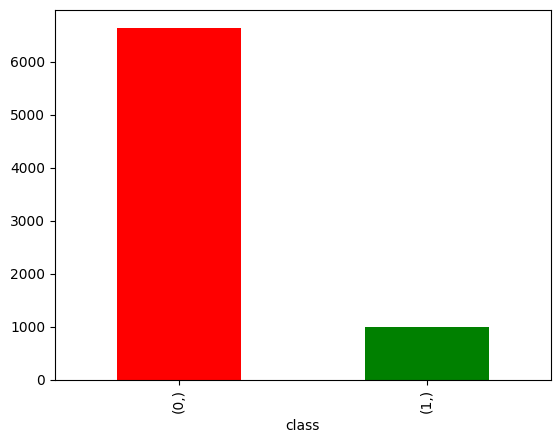

In [ ]:
datos.plot.bar(color = ['red', 'green']);

As we can see from the bar chart above, this dataset has two classes `Less Often` and `More Often`. The two labels are imbalanced with most food items should be chosen less often for diabetic patients.


$ \ $

-----

## ***Build a SVM model with default parameters***

$ \ $

$(1)$ Let's split the training and testing dataset.

* Training dataset will be used to train and tune models, 

* Testing dataset will be used to evaluate the models. 

Note that you may also split a validation dataset from the training dataset for model tuning only.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123) 

$ \ $

$(2)$ Define a `sklearn.svm import SVC` model with all default arguments.


In [ ]:
model = SVC()

$ \ $

$(3)$ Train the model with training dataset.

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
model.fit(X_train, y_train.values.ravel())

SVC()

$ \ $

$(4)$ Make predictions.

In [ ]:
preds = model.predict(X_test)
preds

array([0, 0, 0, ..., 1, 0, 0])

$ \ $

$(5)$ We defined a function to evaluate the model performance.

In [ ]:
def evaluate_metrics(y_test, y_pred):

    # creamos un diccionario vacio
    results_pos = {}

    # añadimos el resultado de accuracy_score(y_test, y_pred) al diccionario
    results_pos['accuracy'] = accuracy_score(y_test, y_pred)

    # usamos la funcion precision_recall_fscore_support sobre y_test, y_pred para determinar precision, recall, f_beta
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, y_pred, average = 'binary')

    # introducimos los datos obtenidos anteriormente al diccionario
    results_pos['precision'] = precision

    # introducimos los datos obtenidos anteriormente al diccionario
    results_pos['recall'] = recall

    # introducimos los datos obtenidos anteriormente al diccionario
    results_pos['f1score'] = f_beta

    # la funcion devuelve el diccionario creado anteriormentte
    return results_pos

$ \ $

$(6)$ Using the previous function, find the SVC model performance.

In [ ]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9568062827225131,
 'precision': 0.8793103448275862,
 'recall': 0.7727272727272727,
 'f1score': 0.8225806451612904}

As we can see from the evaluation results above, the default SVM model achieves relatively good performance on this binary classification task. The overall accuracy is around `0.95` and the f1score is around `0.82`.

$ \ $

## ***Question about the previous result.***

Now, you have easily built a SVM model with relatively good performance. Can we achieve better classification performance by customizing the model?



$ \ $

----

## ***Train SVM with different regularization parameters and kernels***

$ \ $

The SVC model provided by sklearn has two important arguments to be tuned: 

$ \ $

$(\checkmark) \ $ regularization parameter `C`, 

$ \ $

$(\checkmark) \ $  `kernel`.

$ \ $

The `C` argument is a regularization parameter.

*   For $\color{orange}{\text{large values of C}}$, the optimization will choose a smaller-margin hyperplane, if that hyperplane does a better job of getting all the training points classified correctly.


*   For $\color{yellow}{\text{small values of C}}$, the optimization will choose a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

$ \ $

The `kernel` argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:

*   `rbf`: Gaussian Radial Basis Function (RBF)

*   `poly`: Polynomial Kernel

*   `sigmoid`: Sigmoid Kernel





$ \ $

----

## ***Example (regulation parameters and kernels)***

$ \ $

Let's use the parameters $C = 10$ and $kernel =$ 'rbf' ("rbf" = "radial basis function") in a SVM model.

In [ ]:
# creamos un modelo de tipo SVM con los parametros mostrados
model = SVC(C = 10, kernel = 'rbf')

# entrenamos nuestro modelo
model.fit(X_train, y_train.values.ravel())

# precedimos un conjunto de datos con la data de prueba y el modelo entrenado
preds = model.predict(X_test)

# mostramos el desempeño del modelo SVC
evaluate_metrics(y_test, preds)

{'accuracy': 0.9679319371727748,
 'precision': 0.9116022099447514,
 'recall': 0.8333333333333334,
 'f1score': 0.870712401055409}

You should see that we have better performance than the default SVM model trained in the previous step. Now, it's your turn to try different parameters yourself.


$ \ $

----

## ***Coding Exercise: Try different `C` values and `kernels` to see which combination produces SVM models with better classification performance.***


$ \ $

Let's use the parameters $C = 27$ and $kernel =$ 'rbf' ("rbf" = "radial basis function") in a SVM model.

In [ ]:
# creamos un modelo de tipo SVM con los parametros mostrados
model = SVC(C = 27, kernel = 'rbf')

# entrenamos nuestro modelo
model.fit(X_train, y_train.values.ravel())

# precedimos un conjunto de datos con la data de prueba y el modelo entrenado
preds = model.predict(X_test)

# mostramos el desempeño del modelo SVC
evaluate_metrics(y_test, preds)

{'accuracy': 0.9705497382198953,
 'precision': 0.9047619047619048,
 'recall': 0.8636363636363636,
 'f1score': 0.8837209302325582}

$ \ $

------

## ***Tune regularization parameter C and Kernels via GridSearch***

$ \ $

Exhaustively trying different hyperparameters by hands is infeasible (inviable). Thus, `sklearn` provides users with many automatic hyperparameter tuning methods. A popular one is grid search cross-validation `GridSearchCV`. Next, let's quickly try `GridSearchCV` to find the optimized `C` and `kernel` combination. For do this, we have the following steps:

$ \ $


$(1)$ We first define some candidate parameter values we want to search in a `dict` object, like the following setting:




In [ ]:
params_grid = {'C': [1, 10, 100],   'kernel': ['poly', 'rbf', 'sigmoid'] }

$ \ $

$(2)$ We define a SVM model.

In [ ]:
model = SVC()

$ \ $

$(3)$ Create a `GridSearchCV` method to grid search `params_grid` and find the optimized combination with best `f1` score. The searching process may take several minutes to complete.


In [ ]:
# model = SVC()
# params_grid = {'C': [1, 10, 100],   'kernel': ['poly', 'rbf', 'sigmoid'] }

# creamos el modelo GridSearchCV
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring = 'f1',
                           cv = 5,
                           verbose = 1)

In [ ]:
# entrenamos el modelo GridSearchCV creado anteriormente con la data de entreamiento X_train, y_train
grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=1)

In [ ]:
# encontramos los parametros del modelo entrenado
best_params = (grid_search).best_params_
best_params

{'C': 100, 'kernel': 'rbf'}

Okay, we can see `C = 100` and `kernel = 'rbf'` seems to produce the highest f1score. 

$ \ $

$(4)$ Let's quickly try this combination to see the model performance.


In [ ]:
# creamos el modelo SVC
model = SVC(C=100, kernel = 'rbf')

# entrenamos el modelo creado anteriormente
model.fit(X_train, y_train.values.ravel())

# predecimos un conjunto de datos con el modelo entrenamos y la data de prueba X_test
preds = model.predict(X_test)

# describimos el desempeño del modelo anterior
evaluate_metrics(y_test, preds)

{'accuracy': 0.9698952879581152,
 'precision': 0.8877551020408163,
 'recall': 0.8787878787878788,
 'f1score': 0.8832487309644671}

The best f1score now becomes `0.88` after hyperparameter tuning.


$ \ $ 

----

## ***Plot SVM hyperplane and margin***

$ \ $

Okay, you have learned how to define, train, evaluate, and fine-tune a SVM model with `sklearn`. However, so far we only obtained plain evaluation metrics and they are not intuitive to help us understand and interpret an SVM model. It would be great to visualize the see actual hyperplains and margins learned in an SVM model. Since it is challenging to visualize a hyperplane higher than 3 dimensions, we will focus on a 2-dimensional feature space.

$ \ $

$(1)$ We first simplify the dataset with only two features `Calories` and `Dietary Fiber`, and include only 1000 instances:



In [47]:
simplified_food_df = food_df[['Calories', 'Dietary Fiber', 'class']]

In [48]:
X = simplified_food_df.iloc[:1000, :-1].values
y = simplified_food_df.iloc[:1000, -1:].values

$ \ $

$(2)$ We get an undersample of the majority class `Class = 0` to balance the class distribution so we will produce a clearer visualization.


In [54]:
# creamos una submuestra aleatoria
under_sampler = RandomUnderSampler(random_state = 123)

# entrenamos la submuestra aleatoria con la data X e y
X_under, y_under = under_sampler.fit_resample(X, y)

In [55]:
# mostramos el tamaño de la submuestra
print(f"Dataset resampled shape, X: {X_under.shape}, y: {y_under.shape}")

Dataset resampled shape, X: (62, 2), y: (62,)


$ \ $

$(3)$ To better show the hyperplane and margins, we normalize the features with a `MinMaxScaler`.


In [58]:
# creamos el modelo MinMaxScaler
scaler = MinMaxScaler()

# escalamos la data X_under 
X_under = scaler.fit_transform(X_under)

$ \ $

$(4)$ Let's train a linear SVM model with `kernel = linear` so that we can get a linear hyperplane and margins.


In [59]:
# creamos un modelo SVM con los parametros establecidos
linear_svm = SVC(C = 1000, kernel = 'linear')

# entrenamos el modelo anterior con la data X_under, y_under
linear_svm.fit(X_under, y_under)

SVC(C=1000, kernel='linear')

$ \ $

$(5)$ Provided an utility function to plot the decision boundary (hyperplane), support vectors, and margins. You may write your own visualization method if you are interested.

In [65]:
def plot_decision_boundry(X, y, model):

    # creamos una imagen con los tamaños establecidos
    plt.figure(figsize = (12, 8))

    # c = color, x = X[:, 0], y= X[:, 1] and cmap = plt.cm.Paired (cmap name)
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

    # Si actualmente no hay ejes en esta figura, se crea uno nuevo usando
    ax = plt.gca()

    # Devuelve los límites de vista del eje x.
    xlim = ax.get_xlim()

    # Devuelve los límites de vista del eje y.
    ylim = ax.get_ylim()

    # creamos una descripcion para el eje x. Recordar que np.linspace devuelve números espaciados uniformemente en un intervalo específico.
    xx = np.linspace(xlim[0], xlim[1], 30)

    # creamos una descripcion para el eje y. Recordar que np.linspace devuelve números espaciados uniformemente en un intervalo específico
    yy = np.linspace(ylim[0], ylim[1], 30)

    # creamos una cuadrícula para evaluar el modelo
    YY, XX = np.meshgrid(yy, xx)

    # np.vstack = Apila las matrices en secuencia horizontal (en filas). 
    # data.ravel() = Se devuelve una matriz 1-D que contiene los elementos de la entrada.
    matrix = np.vstack([XX.ravel(), YY.ravel()])

    # calculamos la transpuesta del anterior array. De esta manera contruimos la matriz [A | B] con las matrices A y B
    xy = matrix.T

    # Decision function is a method present in classifier{ SVC, Logistic Regression } class of sklearn machine learning framework. 
    # This method basically returns a Numpy array, In which each element represents whether a predicted sample for x_test by the 
    # classifier lies to the right or left side of the Hyperplane and also how far from the HyperPlane.
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors = "k", levels = [-1, 0, 1], alpha = 0.5, linestyles = ["--", "-", "--"])

    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s = 100,
               linewidth = 1,
               facecolors = "none",
               edgecolors = "k" )
    
    plt.show()

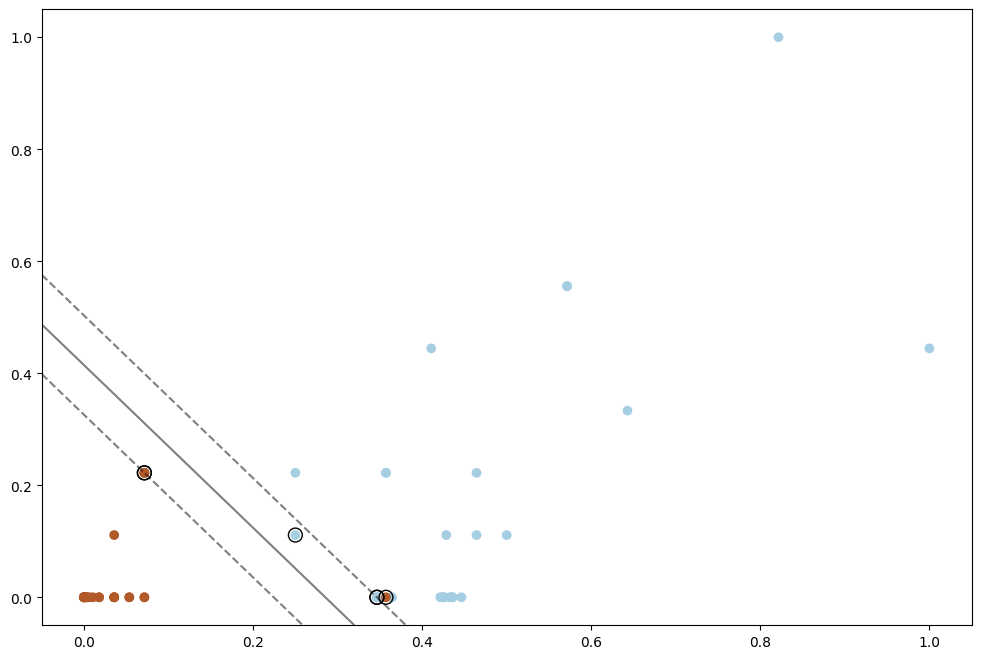

In [66]:
# usamos la funcion creada anteriormente sobre los parametros X_under, y_under, linear_svm
plot_decision_boundry(X_under, y_under, linear_svm)

Okay, we can see a clear linear hyperplane seperates the two classes (Blue dots vs Orange dots). The highlighted dots are the support vectors determining the hyperplain.

$ \ $ 

$(6)$ If we want to include non-linear kernels, we should get a non-linear decision boundary in the 2-d space (maybe linear in higher feature space). So here we use a `rbf` kernel.



In [67]:
# creamos el modelo SVM con los parametros establecidos
svm_rbf_kernel = SVC(C = 100, kernel = 'rbf')  

# entrenamos nuestro modelo con la data X_under, y_under
svm_rbf_kernel.fit(X_under, y_under)

SVC(C=100)

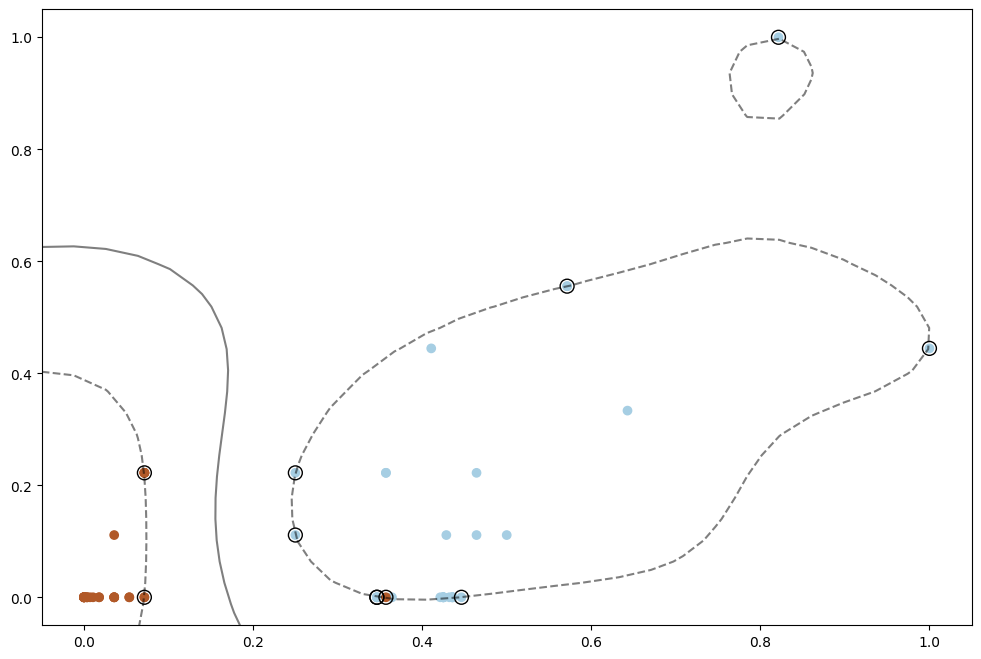

In [68]:
# usamos la funcion creada anteriormente sobre los parametros X_under, y_under, svm_rbf_kernel
plot_decision_boundry(X_under, y_under, svm_rbf_kernel)

We now see a non-linear hyperplane and margins separating the two classes.


$ \ $

---

## ***Exercise***


Try different `C` values and `kernels` to see the how they affect the hyperplanes and margins.


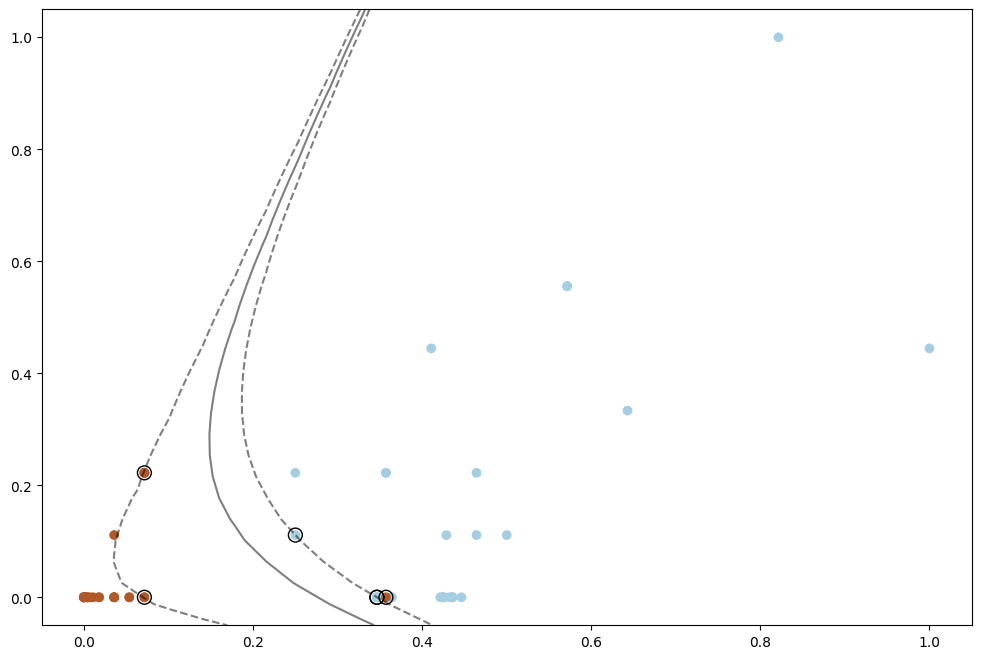

In [69]:
# creamos un modelo SVC con los parametros establecidos
svm_rbf_kernel = SVC(C = 100, kernel = 'poly')

# entrenamos nuestro modelo con la data X_under, y_under
svm_rbf_kernel.fit(X_under, y_under)

# usamos la funcion creada anteriormente sobre los parametros X_under, y_under, svm_rbf_kernel
plot_decision_boundry(X_under, y_under, svm_rbf_kernel)